In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YoutubeLI/master/dataset/nyc_energy_consumption.csv')

In [5]:
df.head(5)

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


In [6]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [8]:
fig = px.line(df, x='timeStamp', y='demand', title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [9]:
df_temp = df.set_index('timeStamp')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb79fb44cd0>,
      dtype=object)

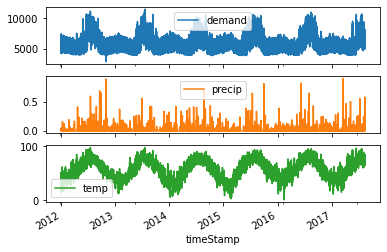

In [10]:
df_temp.plot(subplots=True)

In [11]:
df.query("demand != demand")

,timeStamp,demand,precip,temp
49124,2012-03-11 02:00:00,NaN,0.0000,37.78
49125,2013-03-10 02:00:00,NaN,0.0000,38.18
49126,2014-03-09 02:00:00,NaN,0.0000,40.86
49127,2015-03-08 02:00:00,NaN,0.0000,36.96
49128,2015-03-11 11:00:00,NaN,0.0000,49.95
...,...,...,...,...
49200,2017-08-12 02:00:00,NaN,0.0000,70.84
49201,2017-08-12 03:00:00,NaN,0.0000,70.57
49202,2017-08-12 04:00:00,NaN,0.0000,69.89
49203,2017-08-12 05:00:00,NaN,0.0000,68.59


In [14]:
df["demand"]=df["demand"].fillna(method="ffill")
df["temp"]=df["temp"].fillna(method="ffill")

In [15]:
df_temp = df.set_index('timeStamp')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb79f76fc10>,
      dtype=object)

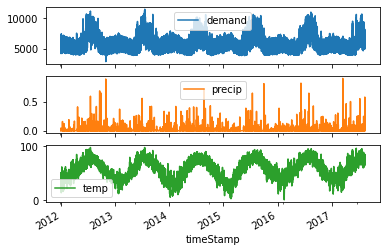

In [16]:
df_temp.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb79cca3690>,
      dtype=object)

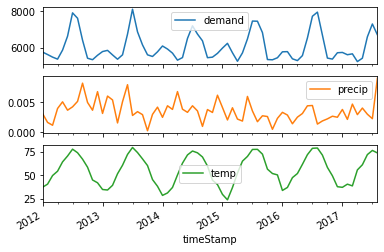

In [18]:
df_temp.resample('M').mean().plot(subplots=True)

In [20]:
df_monthly = df_temp.resample('M').mean()

In [22]:
#!pip install pmdarima

In [23]:
import pmdarima as pm

model = pm.auto_arima(df_monthly["demand"],
                    m=12, seasonal=True,
                    start_p=0, start_q=0,
                    max_order=4, test='adf', error_action='ignore',
                    suppress_warnings=True,
                    stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1100.321, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1023.743, Time=0.38 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.758, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.516, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1022.983, Time=1.21 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1097.636, Time=0.68 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1015.313, Time=1.41 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1014.041, Time=0.50 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1021.211, Time=0.15 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=99

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   68
Model:             SARIMAX(2, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood                -490.572
Date:                                 Sat, 17 Apr 2021   AIC                            993.144
Time:                                         12:16:54   BIC                           1006.461
Sample:                                              0   HQIC                           998.420
                                                  - 68                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3721.6223    792.257      4.697      0.000    2168.827    5274.418
ar.L1          0.8586      0.123      6.985      0.000       0.618       1.099
ar.L2         -0.4748      0.142     -3.352      0.001      -0.752      -0.197
ma.S.L12       0.8923      0.137      6.501      0.000       0.623       1.161
ma.S.L24       0.4571      0.206      2.222      0.026       0.054       0.860
sigma2      9.046e+04   1.58e+04      5.726      0.000    5.95e+04    1.21e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.55
Prob(Q):                              0.89   Prob(JB):                         0.06
Heteroskedasticity (H):               0.78   Skew:                             0.52
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
train=df_monthly[(df_monthly.index.get_level_values(0) >= '2012-01-31') & (df_monthly.index.get_level_values(0) <= '2017-04-30')]
test=df_monthly[(df_monthly.index.get_level_values(0) > '2017-04-30')]


In [26]:
test

,demand,precip,temp
timeStamp,,,
2017-05-31,5421.773060,0.004031,61.115457
2017-06-30,6597.990346,0.003008,71.962625
2017-07-31,7306.861511,0.002272,76.380363
2017-08-31,6711.707542,0.008961,73.730258


In [27]:
model.fit(train['demand'])

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 2, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [31]:
forecast=model.predict(n_periods=4, return_conf_int=True)

In [32]:
forecast

(array([5320.83276907, 6194.15059815, 7184.10814673, 7297.99963366]),
 array([[4724.37020673, 5917.29533142],
        [5391.43563153, 6996.86556476],
        [6358.61998436, 8009.59630911],
        [6467.74938444, 8128.24988287]]))

In [33]:
forecast_df=pd.DataFrame(forecast[0], index=test.index, columns=["Prediction"])

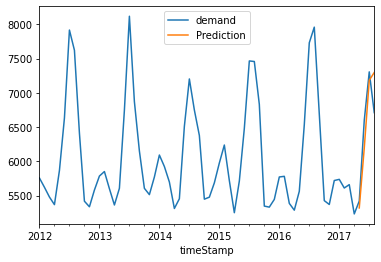

In [34]:
pd.concat([df_monthly["demand"], forecast_df], axis=1).plot()

In [38]:
forecast1=model.predict(n_periods=8, return_conf_int=True)

In [39]:
forecast_range=pd.date_range(start='2017-05-31', periods=8, freq='M')


In [41]:
forecast1_df=pd.DataFrame(forecast1[0], index=forecast_range, columns=["Prediction"])

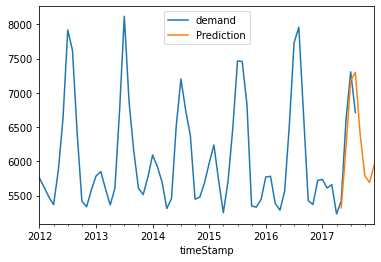

In [42]:
pd.concat([df_monthly["demand"], forecast1_df], axis=1).plot()

In [43]:
lower=pd.Series(forecast1[1][:,0], index=forecast_range)
upper=pd.Series(forecast1[1][:,1], index=forecast_range)

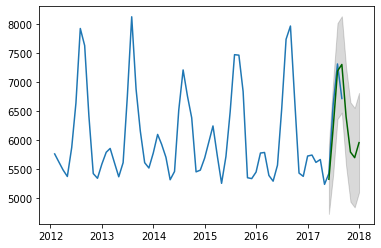

In [45]:
plt.plot(df_monthly["demand"])
plt.plot(forecast1_df, color="darkgreen")
plt.fill_between(forecast_range,
                 lower,
                 upper,
                 color='k', alpha=.15)

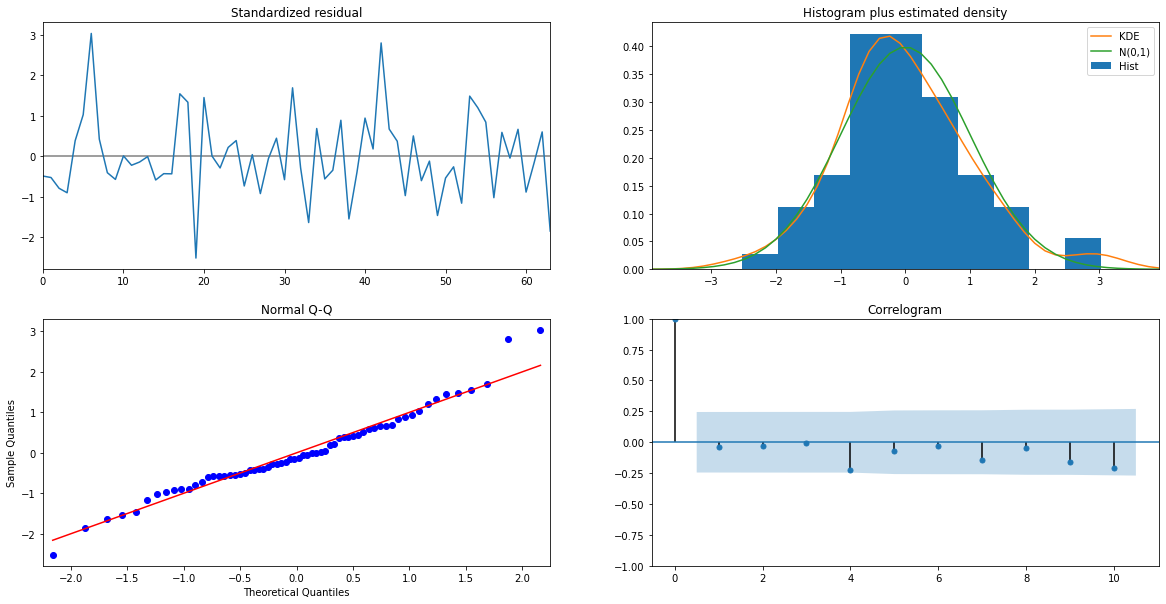

In [48]:
mpl.rcParams['figure.figsize'] = (20,10)
mpl.rcParams['axes.grid'] = False
out=model.plot_diagnostics()

## FB Prophet

y(t) = g(t) + s(t) + h(t) + et

*   g: trend
*   s: seasonality
*   h: holiday
*   e: Noise

In [49]:
from fbprophet import Prophet

In [52]:
df_daily = df_temp.resample('D').mean()

In [53]:
df_final = df_daily.reset_index()[['timeStamp', 'demand']].rename({'timeStamp': 'ds', 'demand':'y'}, axis='columns')

In [54]:
df_final

,ds,y
0,2012-01-01,4954.833333
1,2012-01-02,5302.954167
2,2012-01-03,6095.512500
3,2012-01-04,6336.266667
4,2012-01-05,6130.245833
...,...,...
2046,2017-08-08,6471.626042
2047,2017-08-09,6811.112167
2048,2017-08-10,5546.586500
2049,2017-08-11,5534.683000


In [60]:
train=df_final[(df_final['ds'] >= '2012-01-31') & (df_final['ds'] <= '2017-04-30')]
test=df_final[(df_final['ds'] > '2017-04-30')]


In [61]:
model_fbp = Prophet(interval_width=0.95, yearly_seasonality=True)

In [62]:
model_fbp.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [63]:
model_fbp.params

{'beta': array([[-0.03466656, -0.07039006,  0.05766924,  0.04706038, -0.01401947,
         -0.00491803, -0.00376479, -0.00074901,  0.00244512, -0.00761038,
          0.00411864,  0.00476616, -0.00794669, -0.00481678,  0.00697904,
         -0.00273233, -0.00143593,  0.00162631,  0.00022861, -0.00019963,
         -0.028281  ,  0.02382176,  0.0206688 ,  0.00052902, -0.00497191,
         -0.00507462]]),
 'delta': array([[ 6.25400175e-08, -1.60344690e-02, -4.73873739e-02,
          4.53479291e-10, -2.21096494e-08, -6.49081567e-09,
         -1.21030957e-07,  2.79780452e-08, -3.93473775e-08,
         -2.16214497e-07, -6.81227662e-02, -3.12459419e-02,
         -1.35797359e-08,  2.48969672e-02,  1.98655871e-01,
          1.19808463e-07, -7.72560221e-03, -8.02146615e-02,
         -3.02971916e-02,  4.78274898e-08,  7.95894193e-09,
         -6.77549455e-09,  4.53795611e-03,  1.29713020e-04,
         -3.55328006e-08]]),
 'k': array([[0.05409584]]),
 'm': array([[0.59664812]]),
 'sigma_obs': array([

In [64]:
future = model_fbp.make_future_dataframe(periods=104)
future.tail()

,ds
2016,2017-08-08
2017,2017-08-09
2018,2017-08-10
2019,2017-08-11
2020,2017-08-12


In [65]:
forecast=model_fbp.predict(future)

In [66]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2016,2017-08-08,7583.945092,6663.037315,8493.802532
2017,2017-08-09,7573.257366,6660.160308,8513.556990
2018,2017-08-10,7526.526492,6621.035060,8418.226160
2019,2017-08-11,7483.474815,6576.340034,8429.615402
2020,2017-08-12,6907.685480,6014.385493,7753.954751


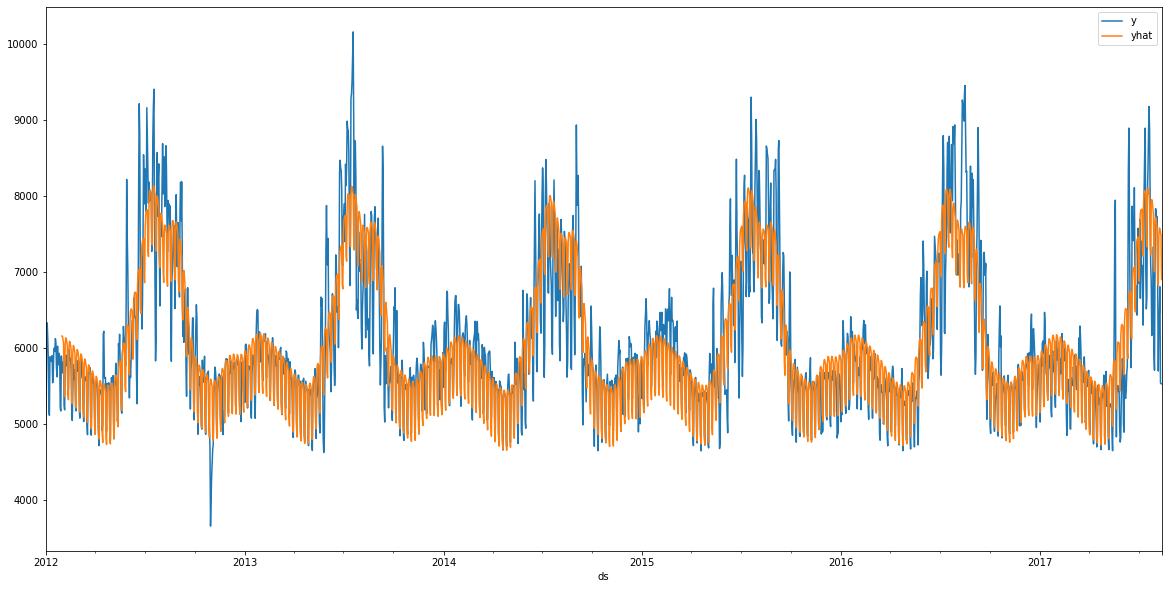

In [67]:
pd.concat([df_final.set_index('ds')['y'], forecast.set_index('ds')['yhat']], axis=1).plot()

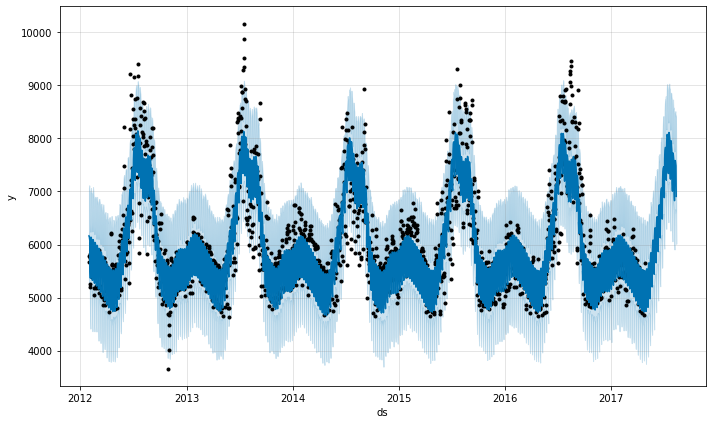

In [68]:
fig1 = model_fbp.plot(forecast)

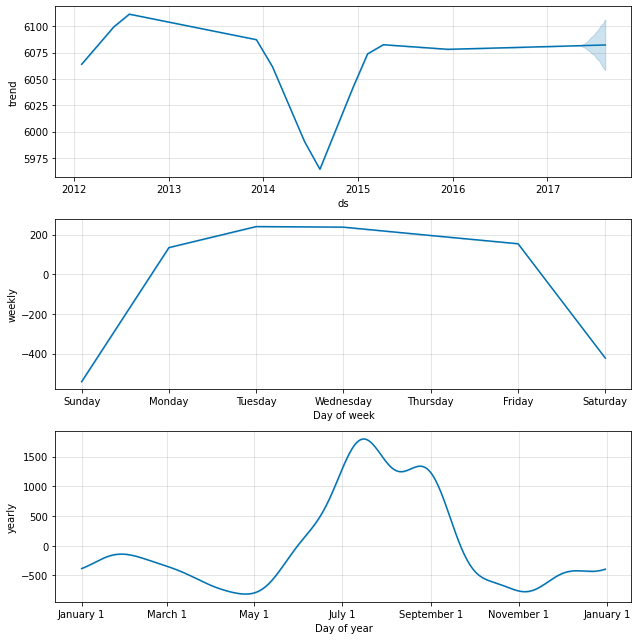

In [69]:
fig2 = model_fbp.plot_components(forecast)

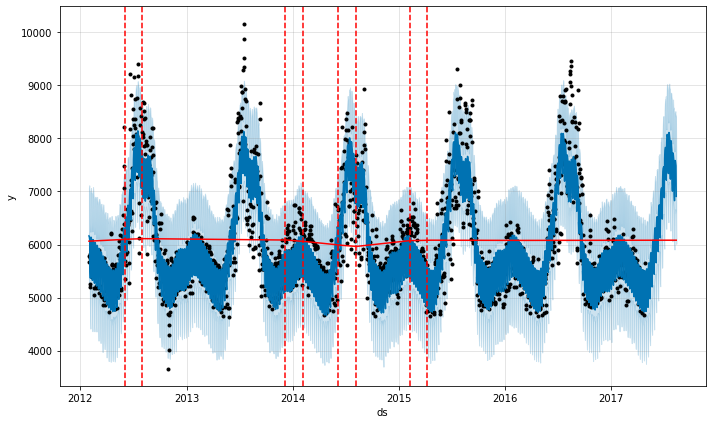

In [70]:
from fbprophet.plot import add_changepoints_to_plot
fig = model_fbp.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_fbp, forecast)


In [71]:
deltas = model_fbp.params["delta"].mean(0)
deltas

array([ 6.25400175e-08, -1.60344690e-02, -4.73873739e-02,  4.53479291e-10,
       -2.21096494e-08, -6.49081567e-09, -1.21030957e-07,  2.79780452e-08,
       -3.93473775e-08, -2.16214497e-07, -6.81227662e-02, -3.12459419e-02,
       -1.35797359e-08,  2.48969672e-02,  1.98655871e-01,  1.19808463e-07,
       -7.72560221e-03, -8.02146615e-02, -3.02971916e-02,  4.78274898e-08,
        7.95894193e-09, -6.77549455e-09,  4.53795611e-03,  1.29713020e-04,
       -3.55328006e-08])

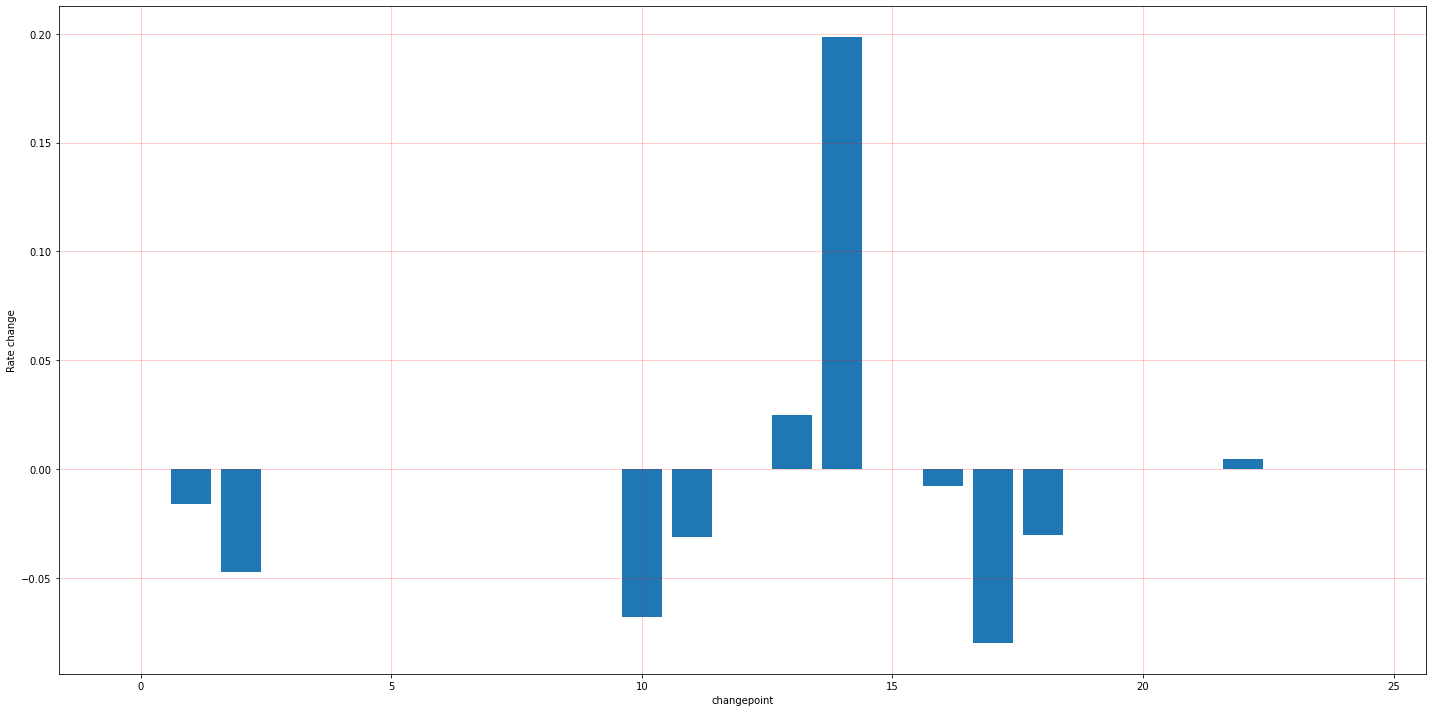

In [73]:
fig = plt.figure(facecolor='w')
ax=fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which="major", c="red", ls="-", lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('changepoint')
fig.tight_layout()

In [74]:
model_fbp.changepoints

61     2012-04-01
123    2012-06-02
184    2012-08-02
245    2012-10-02
306    2012-12-02
368    2013-02-02
429    2013-04-04
490    2013-06-04
552    2013-08-05
613    2013-10-05
674    2013-12-05
735    2014-02-04
797    2014-04-07
858    2014-06-07
919    2014-08-07
980    2014-10-07
1042   2014-12-08
1103   2015-02-07
1164   2015-04-09
1226   2015-06-10
1287   2015-08-10
1348   2015-10-10
1409   2015-12-10
1471   2016-02-10
1532   2016-04-11
Name: ds, dtype: datetime64[ns]

In [75]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

fig = plot_plotly(model_fbp, forecast)
py.iplot(fig)

In [76]:
from fbprophet.diagnostics import cross_validation

cv_results = cross_validation(model=model_fbp, initial='731 days', horizon="365 days")

INFO:fbprophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


In [ ]:
cv_results.head()

In [77]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,251827.102343,501.823776,405.150032,0.072830,0.063863,0.879121
1,37 days 00:00:00,258545.281929,508.473482,412.600101,0.074129,0.064329,0.873626
2,37 days 12:00:00,260796.120327,510.682015,415.864284,0.074689,0.064713,0.873626
3,38 days 00:00:00,262492.188172,512.339915,418.125499,0.074838,0.065111,0.873626
4,38 days 12:00:00,266064.577586,515.814480,423.218719,0.075649,0.065766,0.873626
...,...,...,...,...,...,...,...
653,363 days 00:00:00,262460.198411,512.308694,448.054886,0.082676,0.082025,0.983516
654,363 days 12:00:00,264024.711668,513.833350,448.806045,0.082808,0.082654,0.983516
655,364 days 00:00:00,268215.738438,517.895490,452.188138,0.083627,0.083961,0.978022
656,364 days 12:00:00,268146.078605,517.828233,451.561766,0.083545,0.083961,0.978022


## Multi-variate Time Series using Fbprophet